# **Рабочая тетрадь № 7**
---

### 1.1.1 Пример

*Задача:*
Рассмотрим программу обучения персептрона на языке Python. Сначала 
рассмотрим основной класс персептрона, который умеет учиться по 
тестовым данным:

*Решение:*
Начнем с описания объектов класса:

In [1]:
# класс, который реализует персептрон и его обучение 
class Perceptron:
    def __init__(self, N):
        # создать нулевые веса 
        self.w = list() 
        for i in range(N):
            self.w.append(0)
            # метод для вычисления значения персептрона
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    # пороговая функция активации персептрона
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1
        # обучение на одном примере 
    def learn(self, la, x, y):
        # обучаем только, когда результат неверный 
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]
# обучение по всем данным Т - кортеж примеров
    def learning(self, la, T):
        # цикл обучения 
        for n in range(100):
            # обучение по всем набору примеров 
            for t in T:
                self.learn(la, t[0], t[1])

В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится 
и работает наш персептрон.

In [2]:
# создаем класс двумерного персептрона 
perceptron = Perceptron(2) 
la = 0.1 # константа обучения 
# создаем примеры
T = list()
T.append([[2,1], 1])
T.append([[3,2], 1])
T.append([[4,1], 1])
T.append([[1,2], -1])
T.append([[2,3], -1])
T.append([[5,7], -1]) 
perceptron.learning(la, T) # обучение пеpceптрона 
print(perceptron.w) # печатаем веса 
# проверим работу на тестовых примерах 
print(perceptron.sign([1.5, 2])) 
print(perceptron.sign([3, 1.5])) 
print(perceptron.sign([5,1])) 
print(perceptron.sign([5,10]))

[0.1, -0.1]
-1
1
1
-1


Видим, что что наш персептрон отлично научился распознавать образы, 
относя к классу 1 те вектора, у которых первая компонента больше второй, 
и к классу -1 в противном случае. Хотя устройство персептронов довольно 
простое эти конструкции могут решать и практические задачи. Кроме того, 
из таких персептронов состоят нейронные сети.

### 1.1.2 Пример

Решение:
Для написания кода нейрона будем использовать библиотеку Pytnon
— NumPy:

In [3]:
import numpy as np 
def sigmoid(x):
    # Функция активации: f(x) = 1 / (1 + e^(-х)) 
    return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self. weights = weights 
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias 
        return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1 
bias = 4 # c = 4 
n = Neuron(weights, bias) 
x = np.array([2, 3]) # x = 2, y = 3 
print(n. feedforward(x)) # 0.9990889488055994

0.9990889488055994


In [4]:
import numpy as np 
class OurNeuralNetwork:
    '''
    Данные нейросети:
        - два входа 
        - два нейрона в скрытых слоях (h1, h2) 
        - выход (o1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0, 1]
        - b = 0
    '''
    def __init__(self):
        weights = np.array([0, 1]) 
        bias = 0 
        # Класс Neuron из предыдущего раздела 
        self.h1 = Neuron(weights, bias) 
        self.h2 = Neuron(weights, bias) 
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x) 
        out_h2 = self.h2.feedforward(x) 
        # Входы для o1 - это выходы h1 u h2 
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2])) 
        return out_o1

network = OurNeuralNetwork() 
x = np.array([2, 3]) 
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


Обучение нейросети — это подбор весов, которые соответствуют всем
входам для решения поставленных задач.

Класс нейронной сети:

In [5]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input    = x 
        self.weights1 = np.random.rand(self.input. shape[1],4) 
        self.weights2 = np.random.rand(4,1) 
        self.y        = у 
        self.output   = np.zeros(y.shape)

Каждый этап процесса обучения состоит из:

- прямого распространения (прогнозируемый выход);
- обратного распространения (обновление весов и смещений).

Например:

Дана двуслойная нейросеть:

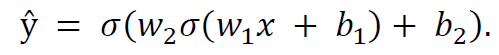

В данном случае на выход ŷ влияют только две переменные — 𝑤 (веса) и 𝑏
(смещение). Настройку весов и смещений из данных входа или процесс
обучения нейросети можно изобразить так:

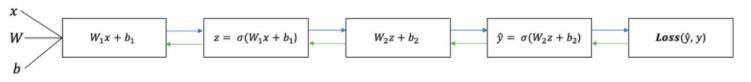

Прямое распространение.

Как видно, формула прямого распространения представляет собой
несложное вычисление:

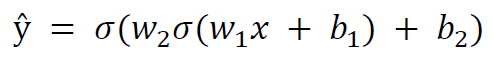

Далее необходимо добавить в код функцию прямого распространения.
Предположим, что смещения в этом случае будут равны 0.

In [6]:
class NeuralNetwork:
    def __ini__(self, x, y):
        self. input   = x 
        self.weights1 = np.random.rand(self.input.shape[1],4) 
        self.weights2 = np.random.rand(4,1) 
        self.y        = у 
        self.output   = np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)) 
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

Чтобы вычислить ошибку прогноза, необходимо использовать функцию
потери. В примере уместно воспользоваться формулой суммы квадратов
ошибок — средним значением между прогнозируемым и фактическим
результатами:

*Обратное распространение*

Обратное распространение позволяет измерить производные в
обратном порядке — от конца к началу, и скорректировать веса и смещения.
Для этого необходимо узнать производную функции потери — тангенс угла
наклона.

Производная функции по отношению к весам и смещениям позволяет
узнать градиентный спуск. Производная функции потери не содержит весов
и смещений, для ее вычисления необходимо добавить правило цепи:

Благодаря этому правилу можно регулировать веса. Добавляем в код
Python функцию обратного распространения:

In [7]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input    = x 
        self.weights1 = np.random.rand(self.input.shape[1],4) 
        self.weights2 = np.random.rand(4,1) 
        self.y        = у 
        self.output   = np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)) 
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
# применение правила цепи для нахождения производной функции потерь по весу2 и весу1 
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output))) 
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
# обновление веса производной (наклона) функции потерь 
        self.weights1 += d_weights1 
        self.weights2 += d_weights2

Нейронные сети базируются на определенных алгоритмах и
математических функциях. Сначала может казаться, что разобраться в них
довольно сложно. Но существуют готовые библиотеки машинного обучения
для построения и тренировки нейросетей, позволяющие не углубляться в их
устройство.

### *Задание:*

Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.

Данные нейросети:
- три входа (𝑥1, 𝑥2, 𝑥3);
- три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);
- выход (𝑜1).

Нейроны имеют идентичные веса и пороги:
- 𝑤 = [0.5, 0.5, 0.5]
- 𝑏 = 0

Данные нейросети:
- два входа (𝑥1, 𝑥2);
- два нейрона в скрытых слоях (ℎ1, ℎ2);
- два выхода (𝑜1, 𝑜2).

Нейроны имеют идентичные веса и пороги:
- 𝑤 = [1, 0];
- 𝑏 = 1.

Реализуйте классы нейронных сетей с использованием других функций
активации.

### *Решение:*

In [8]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tan(x)

def ReLU(x):
    return max(0,x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforwardSigmoid(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    def feedforwardTanh(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
    def feedforwardReLU(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)

class OurNeuralNetwork1:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward_1_1(self, x):
        out_h1 = self.h1.feedforwardSigmoid(x)
        out_h2 = self.h2.feedforwardSigmoid(x)
        out_h3 = self.h3.feedforwardSigmoid(x)
        out_o1 = self.o1.feedforwardSigmoid(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    def feedforward_1_2(self, x):
        out_h1 = self.h1.feedforwardTanh(x)
        out_h2 = self.h2.feedforwardTanh(x)
        out_h3 = self.h3.feedforwardTanh(x)
        out_o1 = self.o1.feedforwardTanh(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    def feedforward_1_3(self, x):
        out_h1 = self.h1.feedforwardReLU(x)
        out_h2 = self.h2.feedforwardReLU(x)
        out_h3 = self.h3.feedforwardReLU(x)
        out_o1 = self.o1.feedforwardReLU(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    
class OurNeuralNetwork2:
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
    def feedforward_2_1(self, x):
        out_h1 = self.h1.feedforwardSigmoid(x)
        out_h2 = self.h2.feedforwardSigmoid(x)
        out_o1 = self.o1.feedforwardSigmoid(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforwardSigmoid(np.array([out_h1, out_h2]))
        return out_o1, out_o2
    def feedforward_2_2(self, x):
        out_h1 = self.h1.feedforwardTanh(x)
        out_h2 = self.h2.feedforwardTanh(x)
        out_o1 = self.o1.feedforwardTanh(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforwardTanh(np.array([out_h1, out_h2]))
        return out_o1, out_o2
    def feedforward_2_3(self, x):
        out_h1 = self.h1.feedforwardReLU(x)
        out_h2 = self.h2.feedforwardReLU(x)
        out_o1 = self.o1.feedforwardReLU(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforwardReLU(np.array([out_h1, out_h2]))
        return out_o1, out_o2
    
network1 = OurNeuralNetwork1()
x1 = np.array([1, 2, 3])
print('Сигмоид первой нейронной сети: ', network1.feedforward_1_1(x1))
print('Тангенс первой нейронной сети: ', network1.feedforward_1_2(x1))
print('ReLU первой нейронной сети: ', network1.feedforward_1_3(x1))

network2 = OurNeuralNetwork2()
x2 = np.array([2, 3])
print('Сигмоид первой нейронной сети: ', network2.feedforward_2_1(x2))
print('Тангенс первой нейронной сети: ', network2.feedforward_2_2(x2))
print('ReLU первой нейронной сети: ', network2.feedforward_2_3(x2))

Сигмоид первой нейронной сети:  0.8067238139969796
Тангенс первой нейронной сети:  -0.21713906537767277
ReLU первой нейронной сети:  4.5
Сигмоид первой нейронной сети:  (0.8757270529783324, 0.8757270529783324)
Тангенс первой нейронной сети:  (1.1555911185916798, 1.1555911185916798)
ReLU первой нейронной сети:  (4, 4)


### 1.2. Введение в нейронные сети с помощью Scikit-Learn в Python

Теперь мы знаем, что такое нейронные сети и какие шаги необходимо
выполнить, чтобы построить простую нейронную сеть с плотными связями.
В этом разделе мы попытаемся построить простую нейронную сеть, которая
предсказывает класс, к которому принадлежит данное растение ириса. Мы
будем использовать библиотеку Python Scikit-Learn для создания нашей
нейронной сети.

*Sklearn предоставляет 2 оценщика для задач классификации и
регрессии соответственно:*
- MLPClassifier;
- MLPRegressor

Начнем с импорта необходимых библиотек.

In [9]:
#Загрузка библиотек 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import sklearn

### MLPClassifier

Загрузка данных

Мы будем загружать два набора данных.

Набор данных цифр: мы будем использовать набор данных цифр,
который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем
использовать цифровые данные для задач классификации.

Набор данных о жилье в Бостоне: мы будем использовать набор
данных о жилье в Бостоне, который содержит информацию о различных
свойствах дома, таких как среднее количество комнат, уровень преступности
на душу населения в городе и т. д. Мы будем использовать его для задач
регрессии.

Sklearn предоставляет оба этих набора данных. Мы можем загрузить
их, вызвав методы load_digits() и load_boston().

In [10]:
from sklearn.datasets import load_digits, load_boston

digits = load_digits() 
X_digits, Y_digits = digits.data, digits.target 
print('Dataset Sizes:', X_digits.shape, Y_digits.shape)

Dataset Sizes: (1797, 64) (1797,)


In [11]:
boston = load_boston() 
X_boston, Y_boston = boston.data, boston.target 
print('Dataset Sizes:',X_boston. shape, Y_boston.shape)

Dataset Sizes: (506, 13) (506,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

*Классификация*

MLPClassifier — это клвсс, доступный как часть модуля neuro_network
sklearn для выполнения задач классификации с использованием
многослойного персептрона.

Как обычно разделим набор данных на две части:
- данные обучения, которые будут использоваться для модели обучения;
- тестовые данные, по которым будет проверяться точность обученной модели.

Функция train_test_split модуля model_selection sklearn поможет нам
разделить данные на два набора: 80% для обучения и 20% для тестирования.
Мы также используем seed(random_state=123) с train_test_split, чтобы мы
всегда получали одно и то же разделение и могли сравнивать и
воспроизволить результаты в будущем.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes: (1437, 64) (360, 64) (1437,) (360,)


Для начала натренируем модель MLPClassifier с параметрами по умолчанию
для тренировочных данных.

In [13]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123) 
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [14]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15]) 
print(Y_test[:15]) 
## Метод Score для оценки точности моделей классификации. 
print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и
предсказанные метки данных по модели. Затем он строит матрицу путаницы,
используя matplotlib.

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  1 33  0  0  0  0  1  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0 36]]


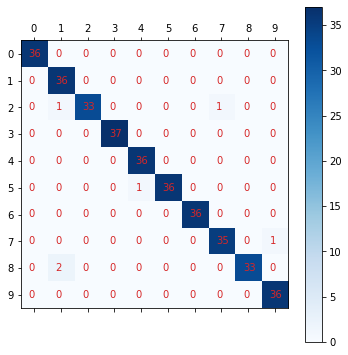

In [15]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds) 
    print(conf_mat) 
    fig = plt.figure(figsize=(6,6)) 
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1) 
    plt.yticks(range(10), range(10)) 
    plt.xticks(range(10), range(10)) 
    plt.colorbar(); 
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier,
которые могут предоставить значимую информацию после обучения
модели.

- loss_ — возвращает убыток после завершения процесса обучения.
- coefs_ — возвращает массив длины n_layers-1, где каждый элемент
представляет веса, связанные с уровнем i.
- intercepts_ — возвращает массив длины n_layers-1, где каждый
элемент представляет собой перехват, связанный с персептронами
слоя i.
- n_iter_ — количество итераций, для которых выполнялась оценка.
- out_activation_ — возвращает имя функции активации выходного
слоя.

In [16]:
print("Loss : ", mlp_classifier.loss_) 
print("Number of Coefs : ", len(mlp_classifier.coefs_)) 
print("Number of Intercepts : ", len(mlp_classifier.intercepts_)) 
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_) 
print("Name of Output Layer Activation Function : ",mlp_classifier.out_activation_)

Loss :  0.0034728684994180608
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  125
Name of Output Layer Activation Function :  softmax


### MLPRegressor

MLPRegressor — это класс, доступный как часть библиотеки
neuro_network sklearn для выполнения задач регрессии с использованием
многослойного персептрона. Также разделим набор данных на две части:   
- данные обучения (80%), которые будут использоваться для
модели обучения;
- тестовые данные (20%), по которым будет проверяться точность
обученной модели.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123) 
print('Train/Test Sizes : ', X_train.shape, X_test. shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (404, 13) (102, 13) (404,) (102,)


In [18]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123) 
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [19]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10]) 
print(Y_test[:10]) ## Метод Score оценивает точность моделей классификации. 
print('Test R*2 Score : %.3f'%mlp_regressor.score(X_test, Y_test)) 
print('Training R*2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R*2 Score : 0.462
Training R*2 Score : 0.510


MLPRegressor имеет все атрибуты такие же, как и у MLPClassifier:

In [20]:
print("Loss :", mlp_regressor.loss_)

Loss : 28.538174061119626


In [21]:
print("Number of Coefs : ", len(mlp_regressor.coefs_)) 
[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs :  2


[(13, 100), (100, 1)]

In [22]:
print("Number of Iterations for Which Estimator Ran :", mlp_regressor.n_iter_)

Number of Iterations for Which Estimator Ran : 130


In [23]:
print("Name of Output Layer Activation Function :",mlp_regressor.out_activation_)

Name of Output Layer Activation Function : identity


### 1.2.1 Задание

### *Задача:*
Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:

https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

а для регрессии датасет зависимости заработной платы от опыта работы:

https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv

### *Решение*

"iris" Dataset Sizes: (150, 4) (150,)
Train/Test Sizes: (120, 4) (30, 4) (120,) (30,)
[1 0 2 2 0 0 2 2 2 0 0 1 2 1 2]
[1 0 2 2 0 0 2 1 2 0 0 1 2 1 2]
Test Accuracy : 0.933
Training Accuracy : 0.992
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


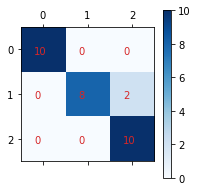

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPRegressor

iris = load_iris() 
X_iris, Y_iris = iris.data, iris.target 
print('"iris" Dataset Sizes:', X_iris.shape, Y_iris.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_iris, Y_iris, train_size=0.80, test_size=0.20, stratify=Y_iris, 
                                                    random_state=123)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

mlp_classifier = MLPClassifier(random_state=123, max_iter=1000)
mlp_classifier.fit(X_train, Y_train)

Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15]) 
print(Y_test[:15]) 
print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds) 
    print(conf_mat) 
    fig = plt.figure(figsize=(3,3)) 
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1) 
    plt.yticks(range(3), range(3)) 
    plt.xticks(range(3), range(3)) 
    plt.colorbar(); 
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

In [25]:
print("Loss : ", mlp_classifier.loss_) 
print("Number of Coefs : ", len(mlp_classifier.coefs_)) 
print("Number of Intercepts : ", len(mlp_classifier.intercepts_)) 
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_) 
print("Name of Output Layer Activation Function : ",mlp_classifier.out_activation_)

Loss :  0.06237838693566961
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  641
Name of Output Layer Activation Function :  softmax


In [26]:
url=r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
salary = pd.read_csv(url)

X_salary = salary.iloc[:, :-1].values 
Y_salary = salary.iloc[:, 1].values 
print('"salary" Dataset Sizes:',X_salary.shape, Y_salary.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_salary, Y_salary, train_size=0.80, test_size=0.20, random_state=123) 
print('Train/Test Sizes : ', X_train.shape, X_test. shape, Y_train.shape, Y_test.shape)

mlp_regressor = MLPRegressor(random_state=123, max_iter=50000) 
mlp_regressor.fit(X_train, Y_train)

Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10]) 
print(Y_test[:10]) 
print('Test R*2 Score : %.3f'%mlp_regressor.score(X_test, Y_test)) 
print('Training R*2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

"salary" Dataset Sizes: (30, 1) (30,)
Train/Test Sizes :  (24, 1) (6, 1) (24,) (6,)
[ 55265.2045971  126554.5591937   52335.80522199 116782.59147446
  55265.2045971  117759.05793283]
[ 54445. 121872.  56642. 116969.  64445. 112635.]
Test R*2 Score : 0.971
Training R*2 Score : 0.948


In [27]:
print("Loss :", mlp_regressor.loss_)
print("Number of Coefs : ", len(mlp_regressor.coefs_)) 
print("Number of Iterations for Which Estimator Ran :", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function :",mlp_regressor.out_activation_)

Loss : 16873681.689960096
Number of Coefs :  2
Number of Iterations for Which Estimator Ran : 30344
Name of Output Layer Activation Function : identity
